In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

df = pd.read_csv(os.path.join('..', 'data', 'cleaned_listings_data.csv'), dtype={'Zip': str})

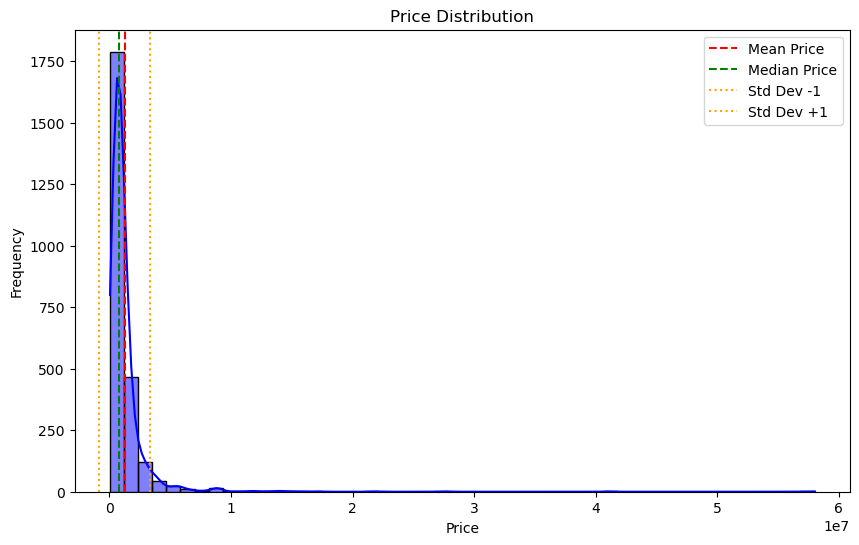

Mean Price Among All Samples: $1,245,128.80
Median Price Among All Samples: $799,999.00
Standard Deviation of Price Among All Samples: $2,085,125.13


In [55]:
king_co_mean_price = df["Price"].mean()
king_co_median_price = df["Price"].median()
king_co_std_price = df["Price"].std()

plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(king_co_mean_price, color='red', linestyle='--', label='Mean Price')
plt.axvline(king_co_median_price, color='green', linestyle='--', label='Median Price')
plt.axvline(king_co_mean_price - king_co_std_price, color='orange', linestyle=':', label='Std Dev -1')
plt.axvline(king_co_mean_price + king_co_std_price, color='orange', linestyle=':', label='Std Dev +1')


plt.legend()

plt.show()
print(f"Mean Price Among All Samples: ${king_co_mean_price:,.2f}")
print(f"Median Price Among All Samples: ${king_co_median_price:,.2f}")
print(f"Standard Deviation of Price Among All Samples: ${king_co_std_price:,.2f}")


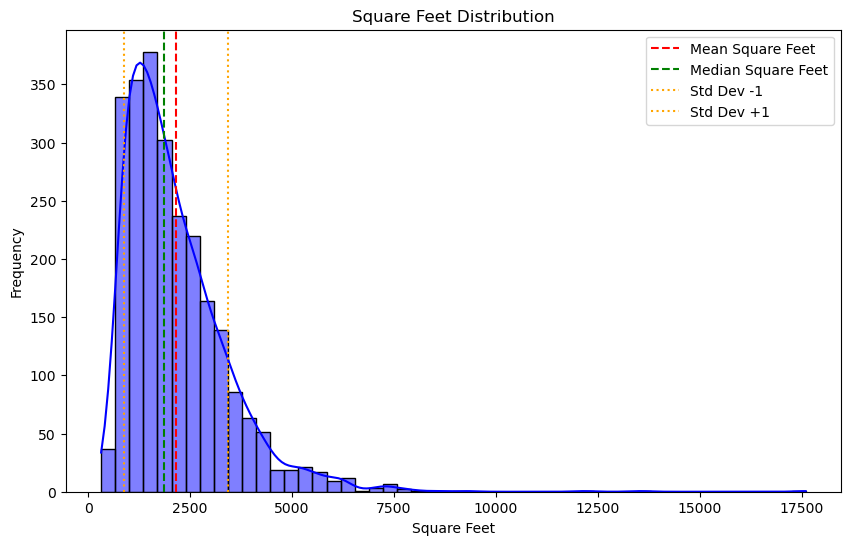

Mean Square Feet Among All Samples: 2,156.72
Median Square Feet Among All Samples: 1,870.00
Standard Deviation of Square Feet Among All Samples: 1,276.03


In [56]:

king_co_mean_sqft = df["Square Feet"].mean()
king_co_median_sqft = df["Square Feet"].median()
king_co_std_sqft = df["Square Feet"].std()

plt.figure(figsize=(10, 6))
sns.histplot(df['Square Feet'], bins=50, kde=True, color='blue')
plt.title('Square Feet Distribution')
plt.xlabel('Square Feet')
plt.ylabel('Frequency')
plt.axvline(king_co_mean_sqft, color='red', linestyle='--', label='Mean Square Feet')
plt.axvline(king_co_median_sqft, color='green', linestyle='--', label='Median Square Feet')
plt.axvline(king_co_mean_sqft - king_co_std_sqft, color='orange', linestyle=':', label='Std Dev -1')
plt.axvline(king_co_mean_sqft + king_co_std_sqft, color='orange', linestyle=':', label='Std Dev +1')
plt.legend()

plt.show()
print(f"Mean Square Feet Among All Samples: {king_co_mean_sqft:,.2f}")
print(f"Median Square Feet Among All Samples: {king_co_median_sqft:,.2f}")
print(f"Standard Deviation of Square Feet Among All Samples: {king_co_std_sqft:,.2f}")


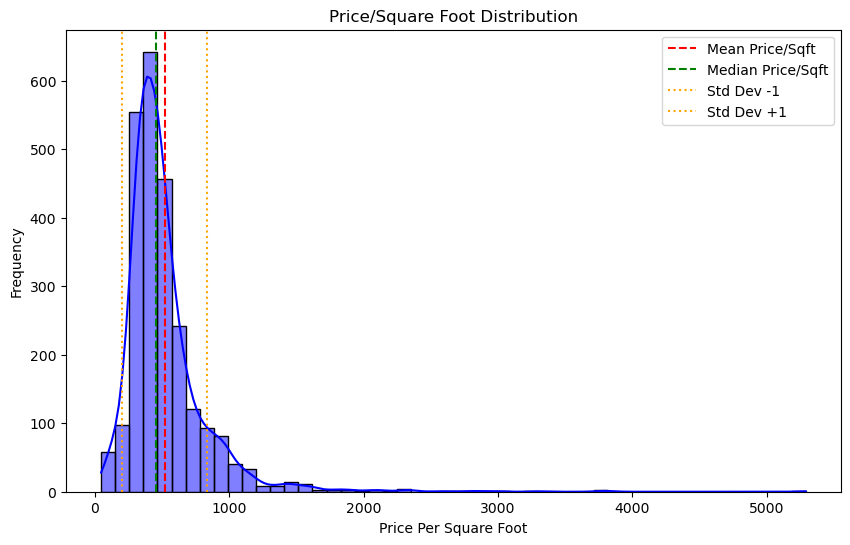

Mean Price Per Square Foot Among All Samples: $518.89
Median Price Per Square Foot Among All Samples: $450.65
Standard Deviation of Price Per Square Foot Among All Samples: $318.03


In [57]:
king_co_mean_price_per_sqft = df["Price/Sqft"].mean()
king_co_median_price_per_sqft = df["Price/Sqft"].median()
king_co_std_price_per_sqft = df["Price/Sqft"].std()

plt.figure(figsize=(10, 6))
sns.histplot(df['Price/Sqft'], bins=50, kde=True, color='blue')
plt.title('Price/Square Foot Distribution')
plt.xlabel('Price Per Square Foot')
plt.ylabel('Frequency')
plt.axvline(king_co_mean_price_per_sqft, color='red', linestyle='--', label='Mean Price/Sqft')
plt.axvline(king_co_median_price_per_sqft, color='green', linestyle='--', label='Median Price/Sqft')
plt.axvline(king_co_mean_price_per_sqft - king_co_std_price_per_sqft, color='orange', linestyle=':', label='Std Dev -1')
plt.axvline(king_co_mean_price_per_sqft + king_co_std_price_per_sqft, color='orange', linestyle=':', label='Std Dev +1')
plt.legend()

plt.show()
print(f"Mean Price Per Square Foot Among All Samples: ${king_co_mean_price_per_sqft:,.2f}")
print(f"Median Price Per Square Foot Among All Samples: ${king_co_median_price_per_sqft:,.2f}")
print(f"Standard Deviation of Price Per Square Foot Among All Samples: ${king_co_std_price_per_sqft:,.2f}")


C:\Users\Jayde\AppData\Local\Temp\ipykernel_26428\270112601.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




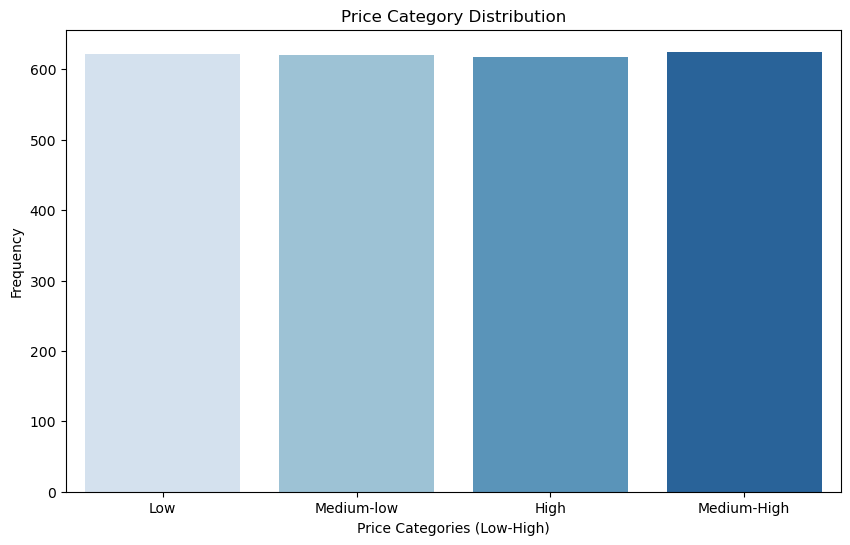

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Price Category', data=df, palette='Blues')
plt.title('Price Category Distribution')
plt.xlabel('Price Categories (Low-High)')
plt.ylabel('Frequency')
plt.show()


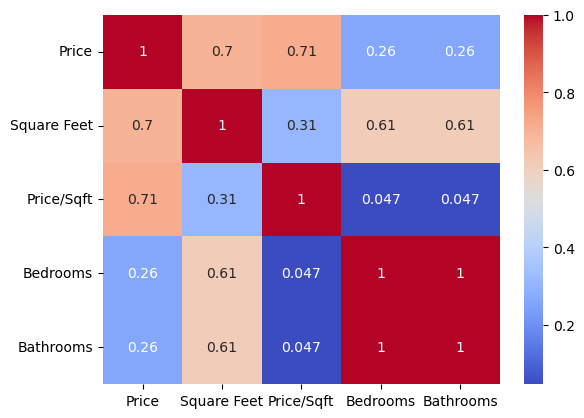

In [58]:
numeric_columns = ['Price', 'Square Feet', 'Price/Sqft', 'Bedrooms', 'Bathrooms']
corr_matrix = df[numeric_columns].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [59]:
city_averages = []
grouped = df.groupby("City")

for city_name, city_data in grouped:
    city_averages.append({
        "City": city_name,
        "Mean Price": city_data["Price"].mean(),
        "Median Price": city_data["Price"].median(),
        "Mean Sqft": city_data["Square Feet"].mean(),
        "Median Sqft": city_data["Square Feet"].median(),
        "Mean Price/Sqft": city_data["Price/Sqft"].mean(),
        "Median Price/Sqft": city_data["Price/Sqft"].median(),
    })

In [68]:
city_averages_df = pd.DataFrame(city_averages)
city_averages_df.sort_values(by="Mean Price", ascending=False, inplace=True)

fig = px.treemap(city_averages_df, path=["City"], values="Mean Price", 
                 title="Mean Housing Prices by City",
                 color="Mean Price", color_continuous_scale="Viridis")
fig.show()

In [71]:
city_averages_df = pd.DataFrame(city_averages)
city_averages_df.sort_values(by="Median Price", ascending=False, inplace=True)

fig = px.treemap(city_averages_df, path=["City"], values="Median Price", 
                 title="Median Housing Prices by City",
                 color="Median Price", color_continuous_scale="Viridis")
fig.show()